### Проект 4 [Стоимость мобильного телефона]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для прогнозирования **диапазона цен** на мобильные телефоны. (```"price_range"```).

    > 0 (низкая цена)
    > 1 (средняя цена)
    > 2 (высокая цена)
    > 3 (очень высокая цена)

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

Для начала, импортируем необходимые библиотеки для обработки данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Загружаем наборы данных

In [2]:
train_data = pd.read_csv('./train_data.csv')
test_data = pd.read_csv('./test_data.csv')

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1938,1,0.5,1,5,0,44,0.5,121,2,...,1299,1935,3497,18,10,18,0,1,0,3
1,1831,0,1.4,1,2,0,43,0.9,150,5,...,611,1381,3834,17,7,13,1,1,1,3
2,763,0,1.7,1,8,1,2,0.5,92,8,...,1028,1186,1050,6,4,8,1,1,0,0
3,851,0,0.5,0,3,0,21,0.4,200,5,...,1171,1263,478,12,7,10,1,0,1,0
4,712,0,0.5,0,6,0,27,0.5,86,2,...,1245,1309,2001,11,10,12,1,1,1,1


In [4]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1701,1,1.6,1,3,0,10,0.3,194,8,...,550,1338,2598,12,9,6,0,1,0,2
1,1484,0,3.0,0,3,0,12,0.6,134,3,...,916,969,1457,14,4,20,1,1,0,1
2,555,1,0.5,1,2,0,17,0.2,163,5,...,956,1010,343,19,14,3,0,1,1,0
3,586,0,2.8,0,2,0,15,0.2,83,3,...,241,854,2592,12,8,3,0,0,0,1
4,980,1,0.5,0,0,1,33,0.9,160,6,...,1008,1758,2268,7,5,4,1,1,0,2


Проверяем датасет на наличие отсутствующих элементов

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1800 non-null   int64  
 1   blue           1800 non-null   int64  
 2   clock_speed    1800 non-null   float64
 3   dual_sim       1800 non-null   int64  
 4   fc             1800 non-null   int64  
 5   four_g         1800 non-null   int64  
 6   int_memory     1800 non-null   int64  
 7   m_dep          1800 non-null   float64
 8   mobile_wt      1800 non-null   int64  
 9   n_cores        1800 non-null   int64  
 10  pc             1800 non-null   int64  
 11  px_height      1800 non-null   int64  
 12  px_width       1800 non-null   int64  
 13  ram            1800 non-null   int64  
 14  sc_h           1800 non-null   int64  
 15  sc_w           1800 non-null   int64  
 16  talk_time      1800 non-null   int64  
 17  three_g        1800 non-null   int64  
 18  touch_sc

In [6]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Как видим, отсутсвующих элементов не наблюдается, также, при вызове функции info() мы узнали, какие у нас типы данных. Ни у какого признака не нужно менять тип, и делать его категориальным 

Аналогично проверим тестовые данные на наличие отсутствующих элементов

In [7]:
test_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
train_data.shape

(1800, 21)

Теперь начнём разбираться в наших признаках. Для начала сделаем матрицу корреляции.

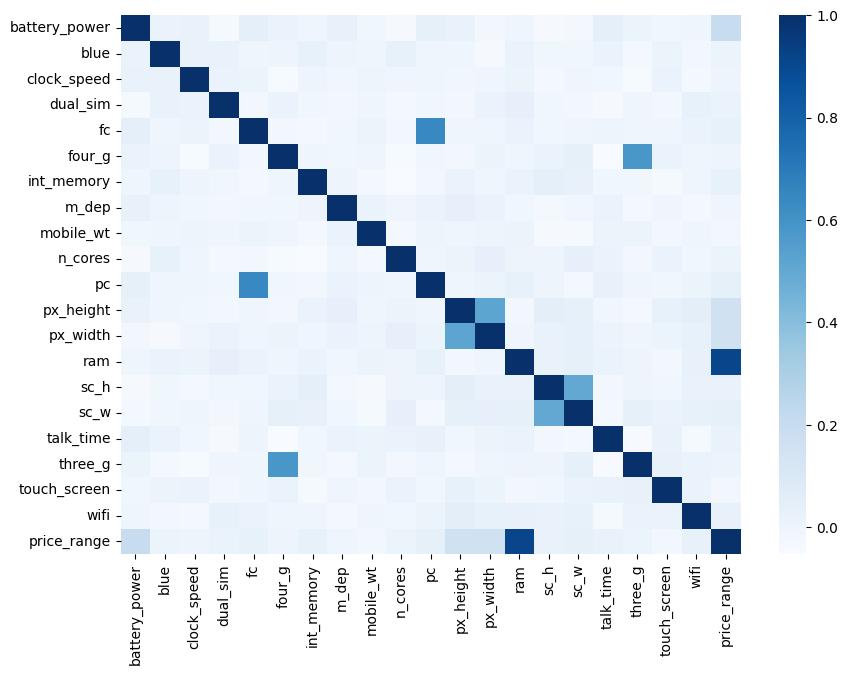

In [9]:
corr_matrix = train_data.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, cmap = 'Blues')
plt.show()

Как мы можем видеть, высокая корреляция наблюдается между признаками: "Фронтальная камера(fc)" - "Основная камера(pc)", "Поддержка сети 4G(four_g)" - "Поддержка сети 3G(three_g)", "Оперативная память(ram)" - "Диапазон цен(price_range)", "Разрешение в пикселях по высоте(px_height)" - "Разрешение в пикселях по ширине(px_width)", "Высота экрана(sc_h)" - "Ширина экрана(sc_w)"

Теперь узнаем корреляционные значения между диапазоном цен и другими признаками

In [10]:
corr_matrix.sort_values(by = ["price_range"], ascending = False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.916437
battery_power    0.201538
px_width         0.161024
px_height        0.153452
sc_w             0.040992
pc               0.039581
int_memory       0.032791
fc               0.031404
wifi             0.025789
sc_h             0.024591
talk_time        0.022510
dual_sim         0.013882
blue             0.011905
three_g          0.009641
n_cores          0.007038
four_g           0.003948
clock_speed      0.002642
m_dep           -0.004293
touch_screen    -0.021328
mobile_wt       -0.023835
Name: price_range, dtype: float64

Как было выше отмечено, диапазон цен сильно зависит от оперативной памяти(ram).

Сделаем графики, которые будут показывать количество принадлежащих к определенной категории данных.

Для начала найдем категориальные данные.

In [74]:
categorical_features = [col for col in train_data.columns if train_data[col].nunique() <= 8]
categorical_features.remove('price_range')
categorical_features

['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

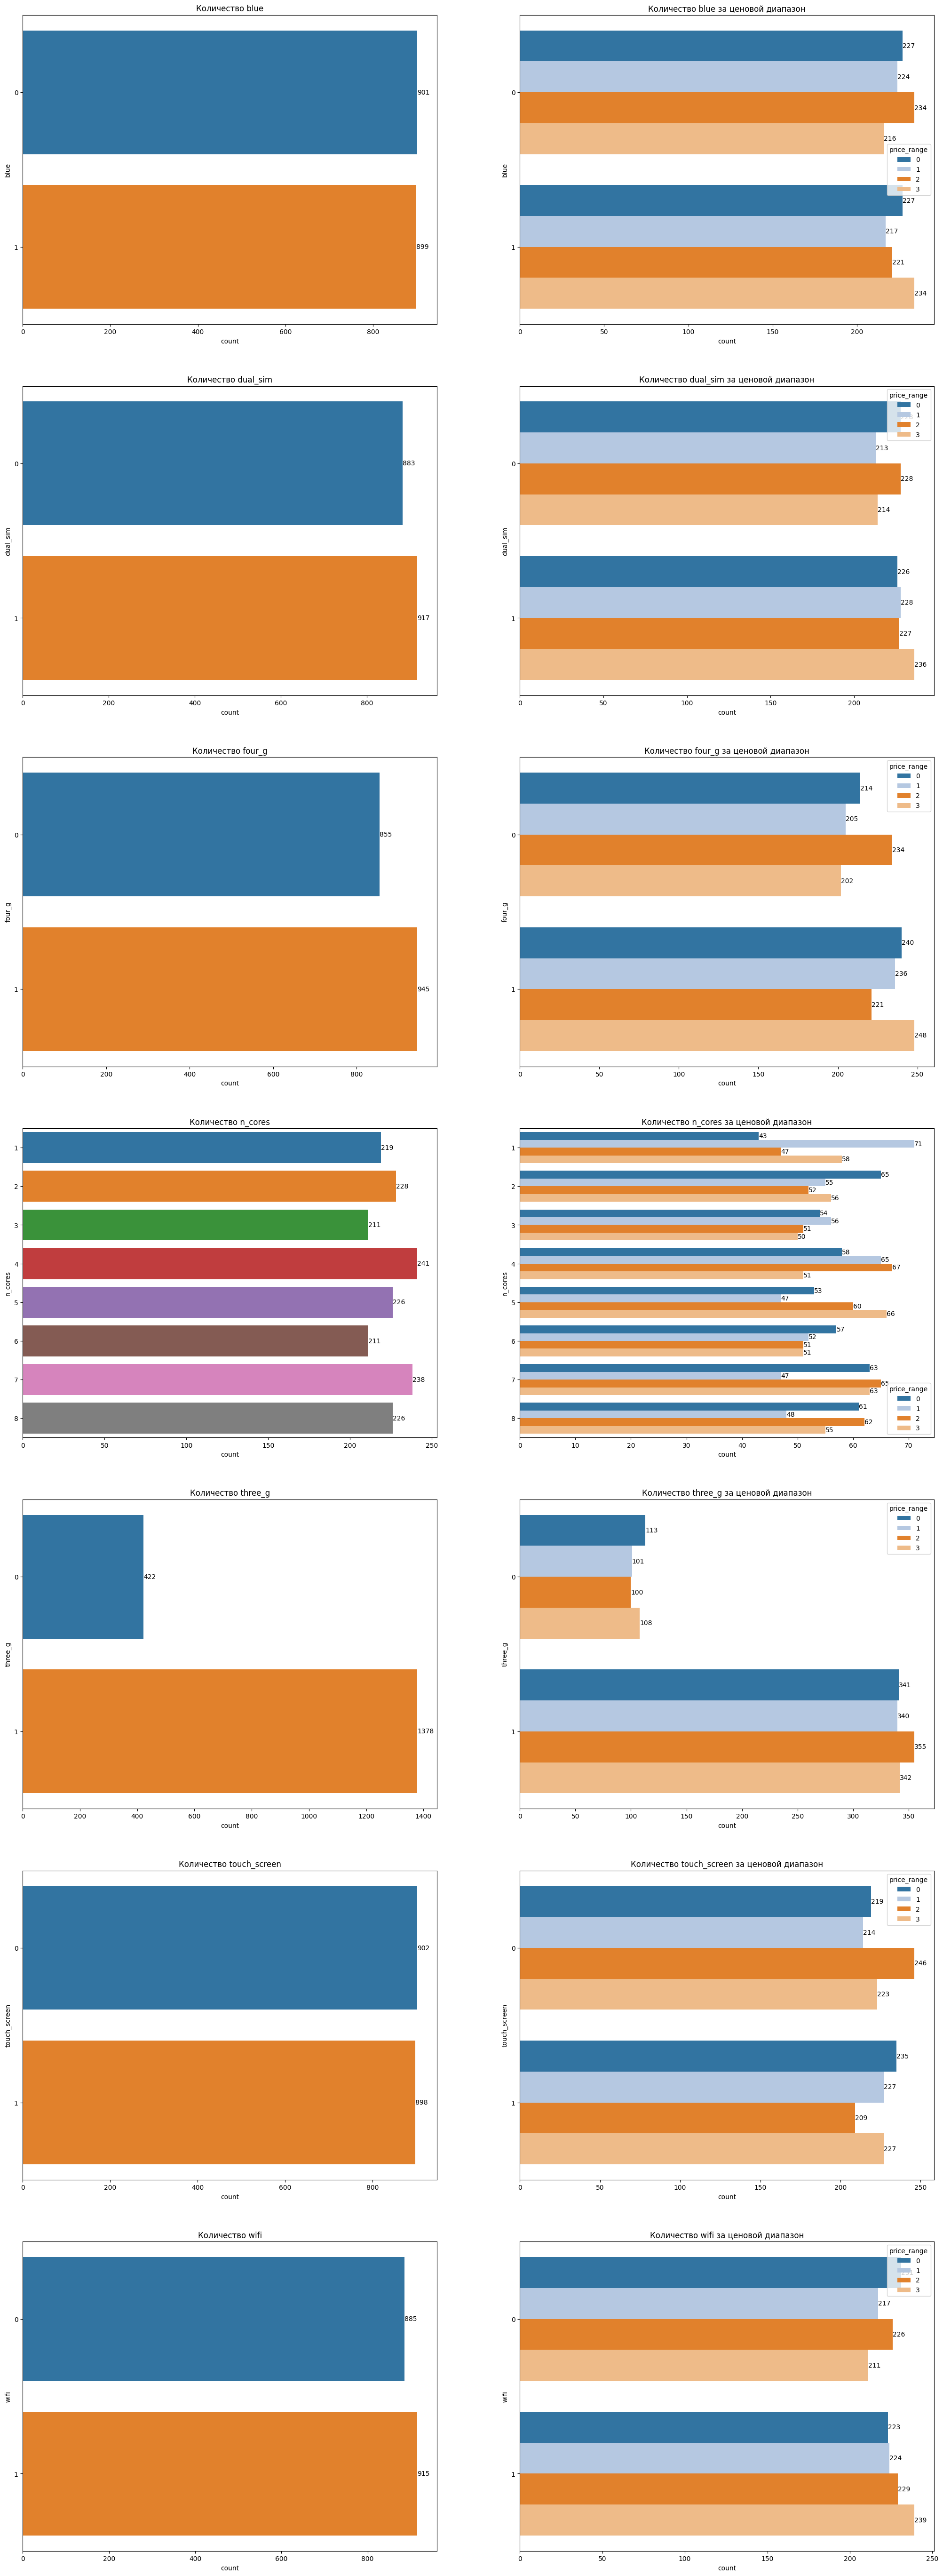

In [75]:
fig, axes = plt.subplots(7,2, figsize=(25,70))
idx = 0
for col in categorical_features:
    sns.countplot(data = train_data, y = col, palette = 'tab10', orient = 'h',
                  ax = axes[idx][0]).set_title(f'Количество {col}')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data = train_data, y = col, palette = 'tab20', orient = 'h',  hue = 'price_range',
                  ax=axes[idx][1]).set_title(f'Количество {col} за ценовой диапазон')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

График "Blue" показывает, что мобильные телефоны без Bluetooth имеют наибольшую частоту появления по сравнению с телефонами с Bluetooth.
Кроме того, график "Blue" для каждого диапазона цен показывает, что в группе мобильных телефонов без Bluetooth наибольшая частота появления наблюдается у телефонов с низкой и высокой стоимостью, а в группе мобильных телефонов с Bluetooth наибольшая частота появления наблюдается у телефонов с очень высокой стоимостью.

График "dual_sim" показывает, что мобильные телефоны с двумя Sim-картами имеют самую высокую частоту.
Более того, график "dual_sim" в каждом ценовом диапазоне показывает, что в группе мобильных телефонов без двойной Sim-карты наиболее часто встречаются дорогие и недорогие телефоны, а в группе мобильных телефонов с двумя Sim-картами наиболее часто встречаются очень дорогие телефоны.

График "four_g" показывает, что мобильные телефоны с поддержкой 4G имеют самую высокую частоту, чем те, у которых нет 4G.
Более того, график "four_g" в каждом ценовом диапазоне показывает, что в группе мобильных телефонов с поддержкой 4G телефоны высокой стоимости имеют самую низкую частоту.

График "n-сores" на диаграмме показывает, что мобильные телефоны, содержащие 4 ядра, имеют самую высокую частоту.
Более того, график "n-cores" в каждом ценовом диапазоне показывает, что в группе мобильных телефонов с 1 ядром, телефоны средней стоимости имеют самую высокую частоту.

График "three_g" показывает, что мобильные телефоны с 3G превосходят телефоны, у которых нет 3G.
Более того, график "three_g" в каждом ценовом диапазоне показывает, что в группе мобильных телефонов с 3G самые высокие частоты имеют дорогостоящие телефоны, а в группе мобильных телефонов без 3G самые низкие частоты имеют недорогие телефоны.

Подсчет на диаграмме "touch_screen" показывает, что мобильные телефоны без сенсорного экрана имеют самую высокую частоту, чем те, у которых имеется сенсорный экран.
Более того, количество touch_screen в каждом ценовом диапазоне показывает, что в группе мобильных телефонов с сенсорным экраном недорогие телефоны имеют самую высокую частоту, а в группе мобильных телефонов без сенсорного экрана дорогие телефоны имеют самую высокую частоту.

Подсчет на диаграмме Wi-Fi показывает, что мобильные телефоны, у которых есть Wi-Fi, имеют самую высокую частоту, чем те, у которых нет Wi-Fi.
Более того, количество Wi-Fi в каждом ценовом диапазоне показывает, что в группе мобильных телефонов с Wi-Fi самая высокая частота у очень дорогих телефонов, а в группе мобильных телефонов без Wi-Fi самая высокая частота у недорогих телефонов.

In [77]:
train_data[categorical_features].describe()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.499444,0.509444,0.525000,4.523333,0.765556,0.498889,0.508333
std,0.500139,0.500050,0.499513,2.289379,0.423769,0.500138,0.500069
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


Теперь исследуем числовые признаки.

In [78]:
numerical_features = [col for col in train_data.columns if train_data[col].nunique() >= 9]
numerical_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [82]:
train_data[numerical_features].describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,1237.533333,1.517944,4.342778,32.197222,0.502778,140.413889,9.911111,646.903333,1251.507222,2123.113889,12.317778,5.760556,10.973333
std,440.853947,0.813604,4.331555,18.192214,0.289281,35.407189,6.043192,444.707272,431.917209,1089.215102,4.210434,4.342084,5.488921
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,848.000000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,280.000000,874.000000,1195.250000,9.000000,2.000000,6.000000
50%,1224.500000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,575.500000,1247.000000,2156.000000,12.000000,5.000000,11.000000
75%,1617.000000,2.200000,7.000000,48.000000,0.800000,170.250000,15.000000,952.000000,1633.000000,3063.250000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


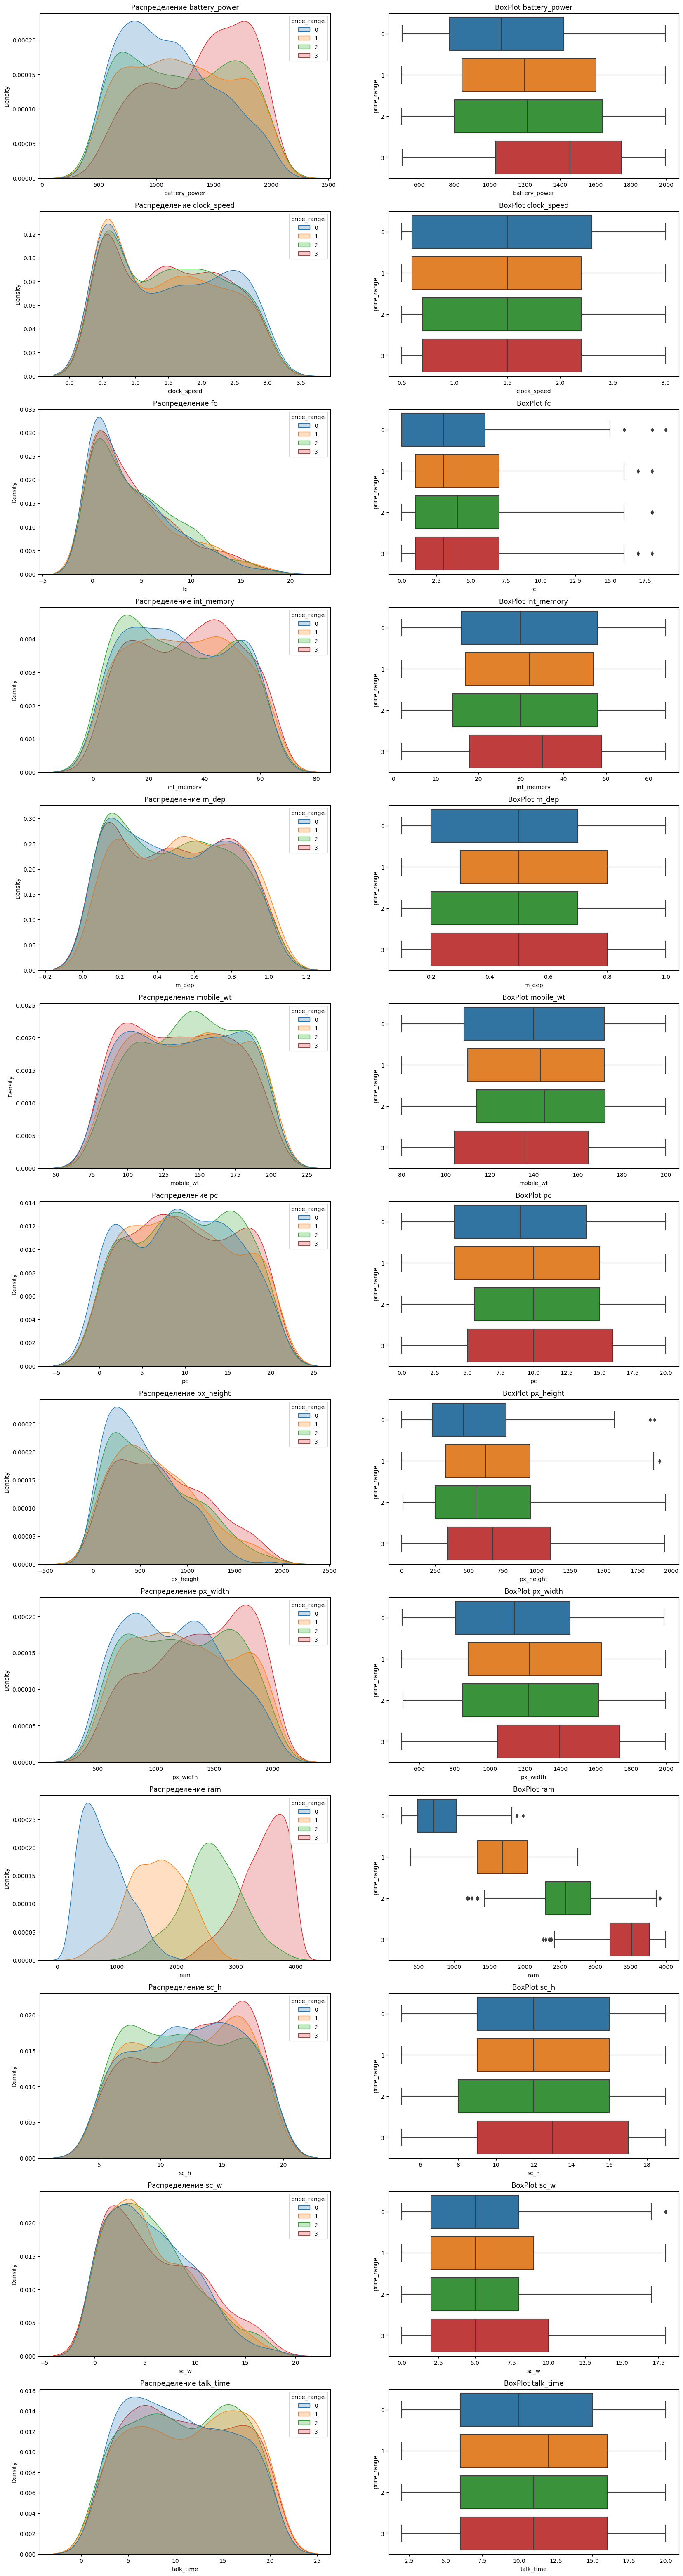

In [81]:
fig, axes = plt.subplots(13,2, figsize=(20,80))
idx = 0
for col in (numerical_features):
    sns.kdeplot(data = train_data, x = col, palette = 'tab10',fill = True , hue = 'price_range', 
                ax = axes[idx][0]).set_title(f'Распределение {col}')
    sns.boxplot(data = train_data, x = col, palette = 'tab10', y = 'price_range', orient = 'h', 
                ax = axes[idx][1]).set_title(f'BoxPlot {col}')
    idx +=1
plt.show()

Нормальное распределение, без перекоса, наблюдается в функциях int_memory, mobile_wt, pc и talk_time для всех ценовых диапазонов.

Мобильные телефоны с ценовыми диапазонами 0-3 в основном имеют емкость аккумулятора в диапазоне 600-800, 700-1350, 600-900 и 1500-1900 мАч соответственно.

Мобильные телефоны всех ценовых диапазонов в основном имеют clock_speed в диапазоне 0.4-0.8.
В распределении clock_speed для всех ценовых диапазонов наблюдается положительная асимметрия.
Boxplot график clock_speed показывает, что все ценовые диапазоны имеют одинаковую медиану, равную 1.5.
Фронтальная камера:

Мобильные телефоны всех ценовых диапазонов в основном имеют разрешение fc в диапазоне 0-2.5 мегапикселя.
Положительная асимметрия наблюдается в распределении fc для всех ценовых диапазонов.
Boxplot график fc показывает, что ценовые диапазоны 0, 1 и 3  имеют одинаковую медиану, равную 3 мегапикселям.

Мобильные телефоны с ценовыми диапазонами 0-3 в основном имеют int_memory в диапазоне 10-30, 35-50, 13-20 и 40-50 гигабайт соответственно.

Мобильные телефоны всех ценовых диапазонов в основном имеют m_dep в диапазоне 0.1-0.2 см.
Boxplot график m_dep показывает, что все ценовые диапазоны имеют одинаковую медиану, равную 0.5 см.

В распределении px_height для всех ценовых диапазонов наблюдается положительная асимметрия.
Мобильные телефоны всех ценовых диапазонов в основном имеют px_height в диапазоне 65-500 пикселей.

Мобильные телефоны с ценовыми диапазонами 0-3 в основном имеют ширину пикселя в диапазоне 750-900, 700-1350, 750-1200 и 1700-1900 пикселей соответственно.

Мобильные телефоны с ценовыми диапазонами 0-3 в основном имеют объем оперативной памяти в диапазоне 450-750, 1350-1900, 2500-2800 и 3500-3950 мегабайт соответственно.

Положительная асимметрия наблюдается в распределении sc_w для всех ценовых диапазонов.
Мобильные телефоны всех ценовых диапазонов в основном имеют sc_w в диапазоне 2.5-4 см.
Boxplot график sc_w показывает, что все ценовые диапазоны имеют одинаковую медиану, равную 5 см.

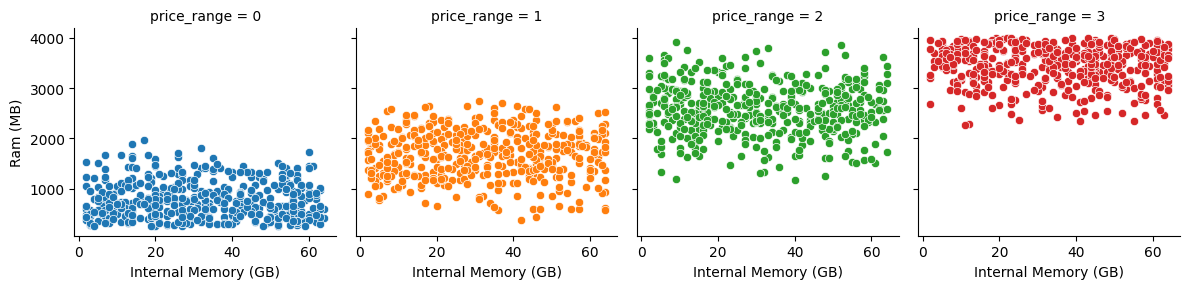

In [83]:
g = sns.FacetGrid(train_data, col = "price_range", hue = "price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")
plt.show()

Чем дороже мобильный телефон, тем больше оперативной памяти, но внутренняя память не всегда больше

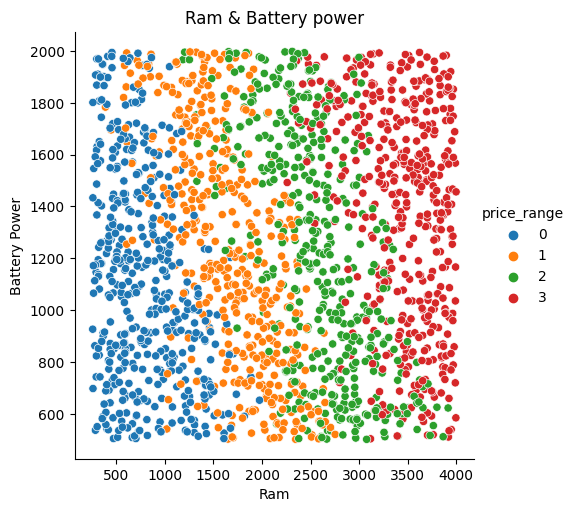

In [86]:
sns.relplot(data = train_data, x = "ram", y = "battery_power", hue = "price_range", palette = "tab10")
plt.xlabel('Ram')
plt.ylabel('Battery Power')
plt.title('Ram & Battery power')
plt.show()

Емкость батареи не обязательно улучшается за счет увеличения объема оперативной памяти мобильных телефонов.

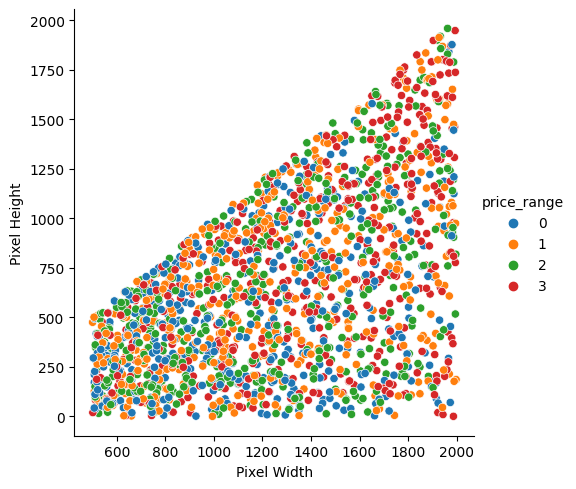

In [85]:
sns.relplot(data = train_data, x = "px_width", y = "px_height", hue = "price_range", palette = "tab10")
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.show()

Как правило, разрешение дисплея показывает, что при увеличении высоты пикселя ширина пикселя будет увеличиваться.

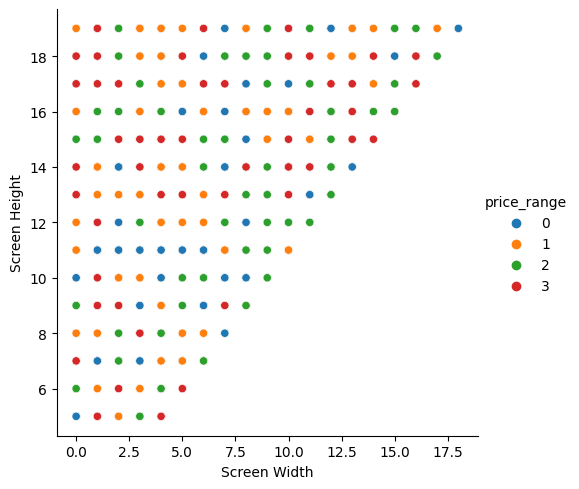

In [87]:
sns.relplot(data = train_data, x = "sc_w", y = "sc_h", hue = "price_range", palette = "tab10")
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

Размер экрана показывает, что при увеличении высоты экрана ширина экрана будет увеличиваться.

2. Обучение и проверка моделей
3. Сравнение моделей на основе метрик классификаций

In [104]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

models = {
    'Support Vector Machine': SVC(kernel = 'linear', random_state = 1),
    'Random Forest': RandomForestClassifier(n_estimators = 120, criterion = 'gini', random_state = 1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 120, random_state = 1)
}

X_train = train_data.drop(['price_range'], axis = 1)
y_train = train_data['price_range']

X_test = test_data.drop(['price_range'], axis = 1)
y_test = test_data['price_range']

for model_name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))

Classification report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      0.95      0.97        59
           2       0.91      0.96      0.93        45
           3       0.96      0.98      0.97        50

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.91      0.90      0.91        59
           2       0.84      0.91      0.87        45
           3       0.98      0.92      0.95        50

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Classification report for Gradient Boos

Модель SVM показала наилучшие результаты среди всех рассмотренных моделей для данной задачи. Все метрики оценки классификации практически идеально предсказывают вероятность каждого класса цен.